In [48]:
# %pip install pandas
# %pip install torch
# %pip install scikit-learn
# %pip install torchvision
# %pip install numpy
# %pip install matplotlib
# %pip install reformer_pytorch

In [49]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import copy
import yfinance as yf
from datetime import datetime, timedelta
import torch
import numpy as np
import time

In [50]:

from exp.exp_main import Exp_Main as Exp
from data_provider.data_factory import data_provider

In [51]:
from conf import get_train_config

In [52]:
# import subprocess
# import os

# # Create the kernel_jupyter folder if it doesn't exist
# os.makedirs('kernel_jupyter', exist_ok=True)

# # Get the current kernel name
# kernel_name = !jupyter kernelspec list | grep python
# print(f"Current kernel: {kernel_name}")

# # Export the current environment to a requirements file
# subprocess.run(['pip', 'freeze'], stdout=open('kernel_jupyter/requirements.txt', 'w'))

# print("Environment saved to kernel_jupyter/requirements.txt")

In [53]:
args, setting = get_train_config()

Data Preprep

In [54]:
_, train_loader = data_provider(args, flag='train')
_, test_loader = data_provider(args, flag='test')

(3018, 101)
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted
in __read_data__ exist nan: False
train 1993
(3018, 101)
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted
in __read_data__ exist nan: False
test 578


Create Models

In [55]:
for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(train_loader):
         print(i)
         print(batch_x.shape, batch_y.shape, batch_x_mark.shape, batch_y_mark.shape)
         break

0
torch.Size([32, 96, 98]) torch.Size([32, 72, 98]) torch.Size([32, 96, 3]) torch.Size([32, 72, 3])


In [56]:
'''Dense Model'''

pred_len = 24

class DenseModel(torch.nn.Module): 
    def __init__(self, input_size = 96*98, output_size=pred_len*98):
        super(DenseModel, self).__init__()

        self.model = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(input_size, 512),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(512, 256),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(256, 128),
            torch.nn.LeakyReLU(),
            torch.nn.Dropout(0.1),
            torch.nn.Linear(128, output_size)
            
        )

        self.loss = torch.nn.MSELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)


    def forward(self, x):
        y = self.model(x)
        print(y.shape)
        print((x.shape[0], pred_len, 98))
        return y.reshape((x.shape[0], pred_len, 98))
    



Train Models

In [ ]:
'''Dense Model'''

n_epochs = args.train_epochs # incase i want to train them for different n_of_epochs

def train_dense(train_loader):
    model = DenseModel()

    loss_fn = model.loss
    optimizer = model.optimizer

    train_steps = len(train_loader)


    for epoch in range(n_epochs):
        
        train_loss = []

        model.train(True)

        epoch_time = time.time()
        for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(train_loader):

            optimizer.zero_grad()

            batch_x = batch_x.float()
            batch_y = batch_y.float()
            output = model(batch_x)

            batch_y = batch_y[:, -pred_len:, :]

            loss = loss_fn(output, batch_y)

            train_loss.append(loss.item())

            loss.backward()
            optimizer.step()

        train_loss = np.average(train_loss)

        vali_loss = 0.0
        test_loss = 0.0

        print("Epoch: {} time: {}".format(epoch + 1, time.time() - epoch_time))
        print("Epoch: {0}, Steps: {1} | Train Loss: {2:.7f} Vali Loss: {3:.7f} Test Loss: {4:.7f}".format(
                epoch + 1, train_steps, train_loss, vali_loss, test_loss))

    return model


dense_model = train_dense(train_loader)

print('Dense Training Finished!')


torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 24, 98)
torch.Size([32, 2352])
(32, 

KeyboardInterrupt: 

In [ ]:
for arg in args.items():
    print(arg)

('is_training', 1)
('model_id', 'test')
('model', 'Autoformer')
('data', 'sp100')
('root_path', 'data')
('data_path', 'sp100_combined_close.csv')
('features', 'M')
('target', 'M')
('frequency', 'D')
('freq', 'd')
('checkpoints', './autoformer_checkpoints/')
('sequence_len', 96)
('label_len', 48)
('pred_len', 24)
('enc_in', 98)
('dec_in', 98)
('c_out', 98)
('d_model', 512)
('n_heads', 8)
('e_layers', 2)
('d_layers', 1)
('d_ff', 2048)
('moving_avg', 50)
('faction', 1)
('distil', True)
('dropout', 0.05)
('activation', 'gelu')
('output_attention', True)
('do_predict', None)
('num_workers', 1)
('itr', None)
('train_epochs', 10)
('batch_size', 32)
('patience', 3)
('learning_rate', 0.0001)
('des', 'train')
('loss', 'mse')
('lradj', 'type1')
('use_amp', False)
('use_gpu', False)
('gpu', None)
('use_multi_gpu', False)
('devices', None)
('embed', 'timeF')
('factor', 3)


In [ ]:
exp = Exp(args)

Use CPU


In [ ]:
    

print(f'Started training for {args.train_epochs}')
exp.train(setting)
print(f'Training call done, who knows if it worked?')

Started training for 10


(3018, 101)
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted
in __read_data__ exist nan: False
train 1993
(3018, 101)
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted
in __read_data__ exist nan: False
val 280
(3018, 101)
found nan in column 33, which belongs to DOW, column deleted
found nan in column 79, which belongs to PYPL, column deleted
in __read_data__ exist nan: False
test 578
Epoch: 1 cost time: 155.7432689666748
Epoch: 1, Steps: 62 | Train Loss: 0.1786661 Vali Loss: 0.2752204 Test Loss: 0.7521367
Updating learning rate to 0.0001
Epoch: 2 cost time: 152.17463088035583
Epoch: 2, Steps: 62 | Train Loss: 0.1062513 Vali Loss: 0.2792997 Test Loss: 0.7751082
EarlyStopping counter: 1 out of 3
Updating learning rate to 5e-05
Epoch: 3 cost time: 142.39073848724365
Epoch: 3, Steps: 62 | Train Loss: 0.0861216 Vali Loss: 0.2759778 Test Loss: 0.

Testing

In [ ]:
from utils.metrics import metric

def test(test_loader, model, call_func):
    
    preds = []
    trues = []

    model.eval()

    with torch.no_grad():
        for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(test_loader):

            batch_x = batch_x.float()
            batch_y = batch_y.float()
            
            batch_x_mark = batch_x_mark.float()
            batch_y_mark = batch_y_mark.float()

            outputs, batch_y = call_func(batch_x, batch_y, batch_x_mark, batch_y_mark)

            preds.append(outputs.detach().cpu().numpy())
            trues.append(batch_y.detach().cpu().numpy())

        preds = np.concatenate(preds, axis=0)
        trues = np.concatenate(trues, axis=0)
        print('test shape:', preds.shape, trues.shape)
        preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
        trues = trues.reshape(-1, trues.shape[-2], trues.shape[-1])
        print('test shape:', preds.shape, trues.shape)


        mae, mse, rmse, mape, mspe = metric(preds, trues)
        print('mse:{}, mae:{}'.format(mse, mae))

        return preds, trues

In [ ]:
def func(batch_x, batch_y, batch_x_mark, batch_y_mark):
    return dense_model(batch_x), batch_y[:, -pred_len:, :]


auto_tpred, auto_trains = test(train_loader, exp.model, exp._predict)
dense_tpred, dense_trains = test(train_loader, dense_model, func)

auto_preds, auto_trues = test(test_loader, exp.model, exp._predict)
dense_preds, dense_trues = test(test_loader, dense_model, func)

test shape: (1984, 24, 98) (1984, 24, 98)
test shape: (1984, 24, 98) (1984, 24, 98)
mse:0.119364432990551, mae:0.2370390146970749
test shape: (1984, 24, 98) (1984, 24, 98)
test shape: (1984, 24, 98) (1984, 24, 98)
mse:0.034495193511247635, mae:0.12998871505260468
test shape: (578, 24, 98) (578, 24, 98)
test shape: (578, 24, 98) (578, 24, 98)
mse:0.7301258444786072, mae:0.5641387701034546
test shape: (578, 24, 98) (578, 24, 98)
test shape: (578, 24, 98) (578, 24, 98)
mse:8.575098991394043, mae:1.8232876062393188


Data Analysis

In [ ]:
print(auto_trues)

[[[ 5.245864    1.562257   -1.6753634  ...  1.8227317   1.8864053
    2.2854738 ]
  [ 5.418561    1.519567   -1.6497885  ...  1.8227317   1.830339
    2.2997847 ]
  [ 5.4276495   1.5993937  -1.69425    ...  1.8061739   1.801257
    2.3097415 ]
  ...
  [ 5.748384    1.8437911  -1.4548837  ...  1.4959953   1.4182212
    2.572332  ]
  [ 6.0874453   1.7148535  -1.484037   ...  1.4695063   1.3050404
    2.5598865 ]
  [ 5.9805346   1.7805082  -1.7280403  ...  1.5257999   1.3383131
    2.4205034 ]]

 [[ 5.418561    1.519567   -1.6497885  ...  1.8227317   1.830339
    2.2997847 ]
  [ 5.4276495   1.5993937  -1.69425    ...  1.8061739   1.801257
    2.3097415 ]
  [ 5.1374626   1.5788587  -1.7839617  ...  1.7829922   1.7423089
    2.2829857 ]
  ...
  [ 6.0874453   1.7148535  -1.484037   ...  1.4695063   1.3050404
    2.5598865 ]
  [ 5.9805346   1.7805082  -1.7280403  ...  1.5257999   1.3383131
    2.4205034 ]
  [ 6.192321    1.7724096  -1.6773225  ...  1.6149724   1.4140291
    2.4777493 ]]

 [[ 

In [ ]:
print(auto_trues.shape)
print(dense_trues.shape)
print(auto_preds.shape)
print(dense_preds.shape)

(578, 24, 98)
(578, 24, 98)
(578, 24, 98)
(578, 24, 98)


In [ ]:
print(auto_trues[:, 0,0 ])

[5.245864  5.418561  5.4276495 5.1374626 4.95215   5.1618986 5.3288846
 5.1934633 5.1313534 5.034622  4.953165  5.146625  5.2392826 5.305466
 5.414413  5.4459777 5.6832185 5.684238  5.7840204 5.727001  5.8960233
 5.748384  6.0874453 5.9805346 6.192321  6.007006  6.102718  6.071154
 5.9764605 5.8094764 5.827804  5.9591517 5.977479  6.363379  6.28905
 6.096609  5.898059  5.9184246 5.4775414 5.2219725 5.0366597 5.4184856
 5.3706303 4.9674206 4.965386  5.3115745 5.319719  5.466341  5.6251802
 5.632308  5.4347773 5.2688084 5.160882  5.1812444 5.0804434 4.8717113
 4.905312  4.9022555 4.880874  5.2341914 5.09877   4.9042926 4.7352715
 4.604942  4.607997  4.6884346 4.799418  4.8405204 4.775785  4.652485
 4.9093623 4.862097  4.857987  4.8117504 4.869291  4.80661   4.8004465
 4.640153  4.681255  4.7069435 4.649402  4.4449277 4.308267  4.237368
 4.3534784 4.36067   4.1993513 4.288745  4.5620627 4.4921913 4.569256
 4.7069435 4.5302105 4.577477  4.595971  4.619604  4.570283  4.419238
 4.397661  4.6

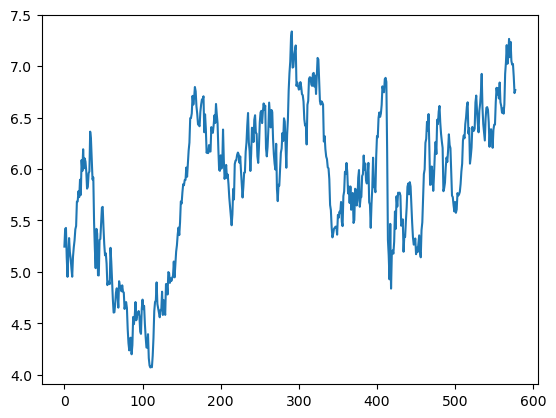

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(auto_trues[:, 0, 0])
plt.show()

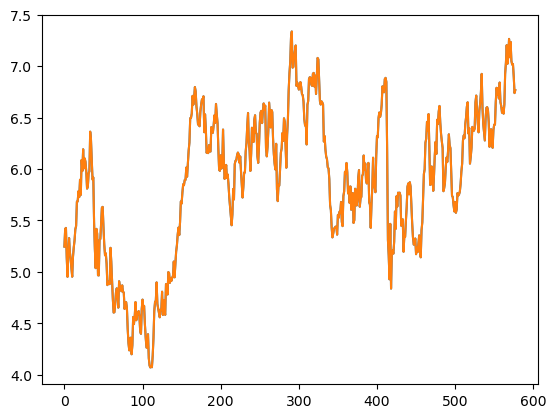

In [ ]:
plt.plot(np.arange(len(auto_trues[:, 0, 0])), auto_trues[:, 0, 0])
plt.plot(np.arange(len(dense_trues[:, 0, 0])), dense_trues[:, 0, 0])

plt.show()

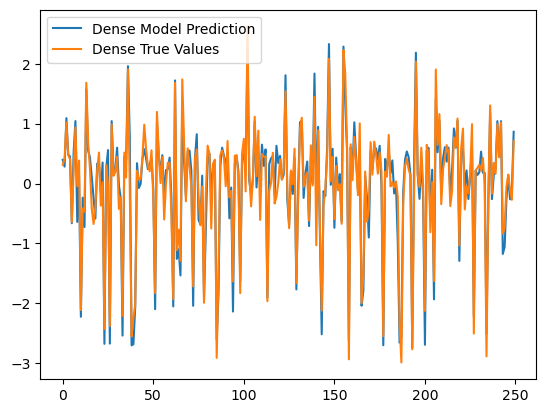

In [ ]:
plt.plot(dense_tpred[1000:1250, 0, 0], label='Dense Model Prediction')
plt.plot(dense_trains[1000:1250, 0, 0], label='Dense True Values')
plt.legend()

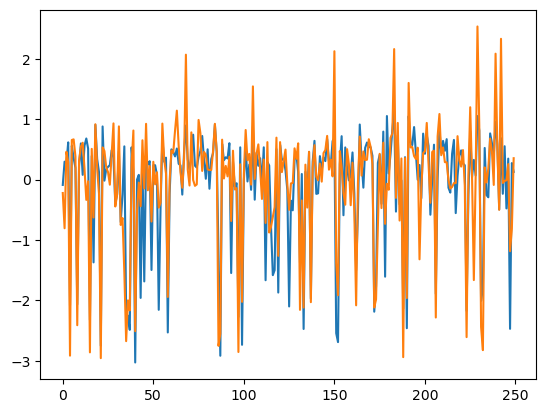

In [ ]:
plt.plot(auto_tpred[1000:1250, 0, 0], label='Autoformer Prediction')
plt.plot(auto_trains[1000:1250, 0, 0], label='True Values')


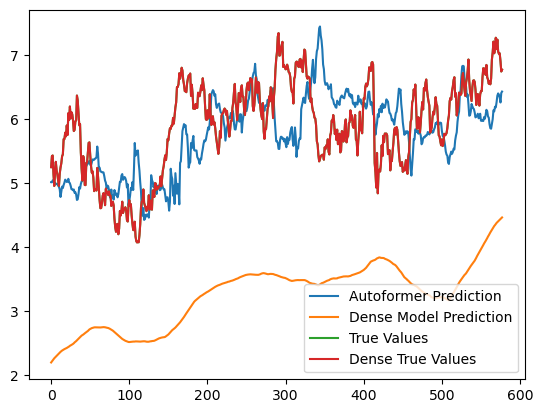

In [ ]:
plt.plot(auto_preds[:, 0, 0], label='Autoformer Prediction')
plt.plot(dense_preds[:, 0, 0], label='Dense Model Prediction')
plt.plot(auto_trues[:, 0, 0], label='True Values')
plt.plot(dense_trues[:, 0, 0], label='Dense True Values')
plt.legend()

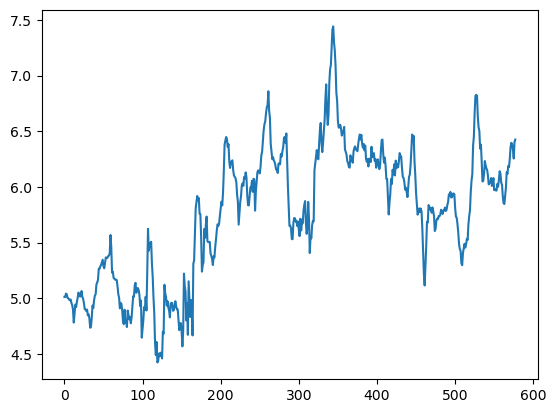

In [ ]:
plt.plot(auto_preds[:, 0, 0], label='Autoformer Prediction')

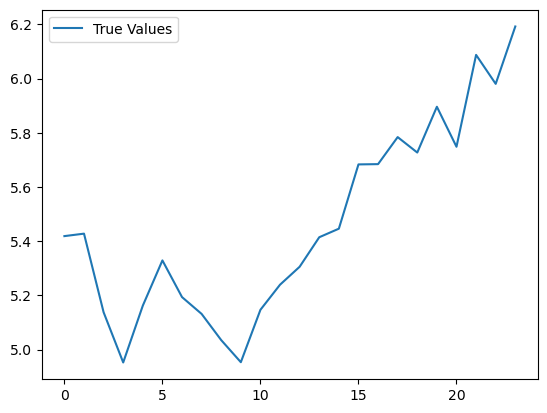

In [ ]:
plt.plot(auto_trues[1, :, 0], label='True Values')
plt.legend()

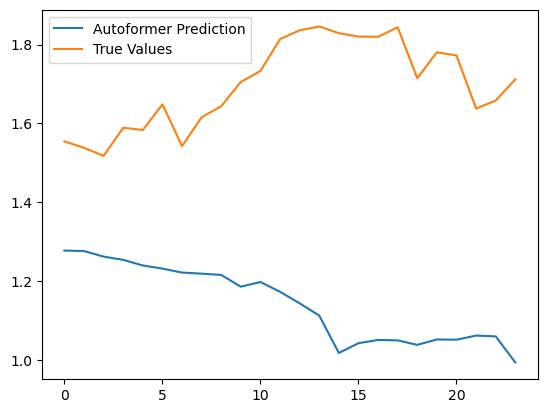

In [ ]:
plt.plot(auto_preds[4, :, 1], label='Autoformer Prediction')
plt.plot(auto_trues[4, :, 1], label='True Values')
plt.legend()

In [ ]:
inverse_pred = train_loader.inverse_transform(auto_preds)
inverse_trues = train_loader.inverse_transform(auto_trues)

AttributeError: 'DataLoader' object has no attribute 'inverse_transform'